In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.shape

(404290, 6)

In [3]:
df = df.iloc[:25000]

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            25000 non-null  int64 
 1   qid1          25000 non-null  int64 
 2   qid2          25000 non-null  int64 
 3   question1     25000 non-null  object
 4   question2     25000 non-null  object
 5   is_duplicate  25000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.1+ MB


In [6]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
# duplicate rows
df.duplicated().sum()

0

is_duplicate
0    15694
1     9306
Name: count, dtype: int64
is_duplicate
0    62.776
1    37.224
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

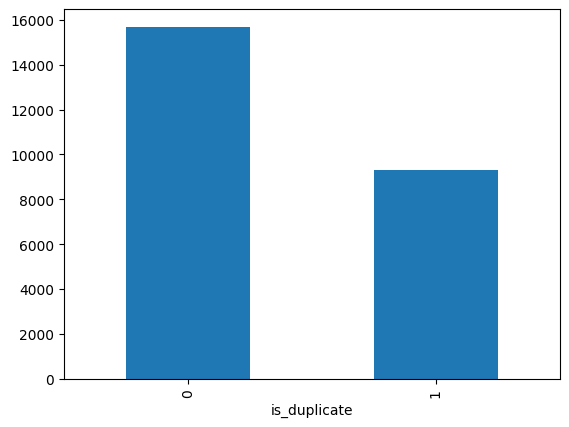

In [8]:
# distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts() / df['is_duplicate'].count()) * 100)

df['is_duplicate'].value_counts().plot(kind='bar')

In [9]:
# repeated questions 

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("Number of unique questions: ", np.unique(qid).shape[0])
x = qid.value_counts() > 1
print(qid.value_counts)
print("Number of questions getting repeated: ", x[x].shape[0])

Number of unique questions:  46634
<bound method IndexOpsMixin.value_counts of 0            1
1            3
2            5
3            7
4            9
         ...  
49995    46626
49996    46628
49997    46630
49998    46632
49999    46634
Length: 50000, dtype: int64>
Number of questions getting repeated:  2606


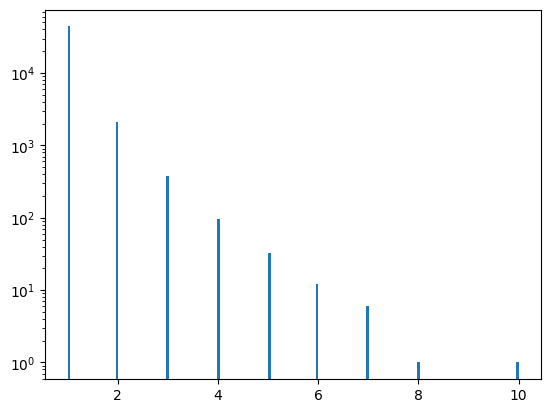

In [10]:
# repeated questions histogram

plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

# creating model in simple way without using any features

In [11]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
ques_df = df[['question1', 'question2']]
ques_df.head()

,question1,question2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# merge text
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [17]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)

temp_df = pd.concat([temp_df1, temp_df2], axis=1)

In [18]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
temp_df['is_duplicate'] = df['is_duplicate']

In [20]:
temp_df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
12056,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
12801,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
17035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [24]:
rf = RandomForestClassifier(n_jobs=-1, verbose=2)

rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.7s


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100building tree 35 of 100

building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100building tree 63 of 100

building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   59.5s finished


RandomForestClassifier(n_jobs=-1, verbose=2)

In [25]:
y_pred = rf.predict(X_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.4s finished


In [26]:
accuracy_score(y_pred, y_test) * 100

72.64

In [27]:
from xgboost import XGBClassifier

In [28]:
xgb = XGBClassifier(verbose=2, random_state=42, tree_method="hist", device="cuda")

xgb.fit(X_train, y_train)

C:\Users\write\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [23:59:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [29]:
y_pred = xgb.predict(X_test)

C:\Users\write\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [23:59:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [30]:
accuracy_score(y_pred, y_test) * 100

71.3

### Feature Engineering (to increase accuracy)

In [31]:
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
24995,24995,46625,46626,What is fungal laccase?,What is the function of fungal laccase?,0
24996,24996,46627,46628,How do I spy on my wife's iPad?,How can I spy on my wife's phone?,0
24997,24997,46629,46630,How can Kaprekar's constant (6174) be proved u...,What is it like using MS Excel on a Mac?,0
24998,24998,46631,46632,Is Hillary Clinton a dishonest candidate?,Does Hillary Clinton have a pattern of lies an...,1


In [32]:
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [33]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39


In [34]:
df['q1_num_words'] = df['question1'].apply(lambda x: len(x.split()))
df['q2_num_words'] = df['question2'].apply(lambda x: len(x.split()))

In [35]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7


In [36]:
def common_words(row):
    c1 = set(map(lambda x: x.lower().strip(), row['question1'].split()))
    c2 = set(map(lambda x: x.lower().strip(), row['question2'].split()))
    return len(c1 & c2)

In [37]:
df['word_common'] = df.apply(common_words, axis=1)

In [38]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2


In [39]:
def total_words(row):
    t1 = set(map(lambda x: x.lower().strip(), row['question1'].split()))
    t2 = set(map(lambda x: x.lower().strip(), row['question2'].split()))

    return (len(t1) + len(t2))

In [40]:
df['words_total'] = df.apply(total_words, axis=1)

In [41]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,words_total
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,23
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,20
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4,24
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0,19
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2,20


In [42]:
df['word_share'] = round(df['word_common'] / df['words_total'], 2)

In [43]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,words_total,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,23,0.43
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,20,0.20
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4,24,0.17
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0,19,0.00
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2,20,0.10


q1_len
Maximum characters:  370
Minimum characters:  1
Average Characters:  59


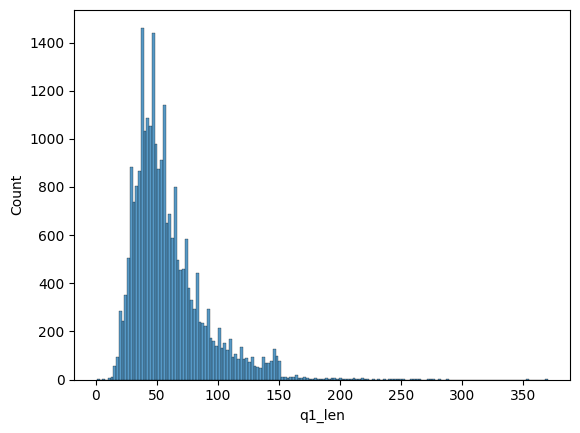

In [44]:
# Analysis of features

print('q1_len')
sns.histplot(df['q1_len'])
print("Maximum characters: ", max(df['q1_len']))
print("Minimum characters: ", min(df['q1_len']))
print("Average Characters: ", int(df['q1_len'].mean()))

q2_len
Maximum characters:  1169
Minimum characters:  6
Average characters:  60


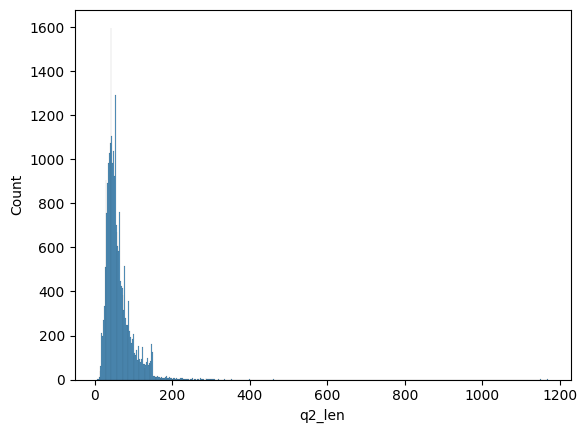

In [45]:
print('q2_len')
sns.histplot(df['q2_len'])
print('Maximum characters: ', max(df['q2_len']))
print('Minimum characters: ', min(df['q2_len']))
print('Average characters: ', int(df['q2_len'].mean()))

q1_num_words
Maximum q1 words:  71
Minimum q1 words:  1


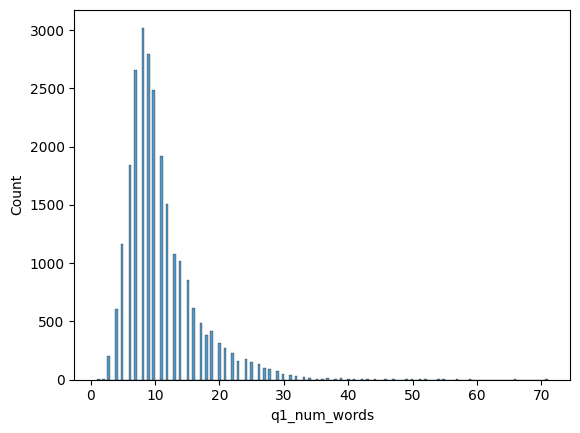

In [46]:
print('q1_num_words')
sns.histplot(df['q1_num_words'])
print("Maximum q1 words: ", max(df['q1_num_words']))
print("Minimum q1 words: ", min(df['q1_num_words']))

q2_num_words
Maximum words:  237
Minimum words:  1


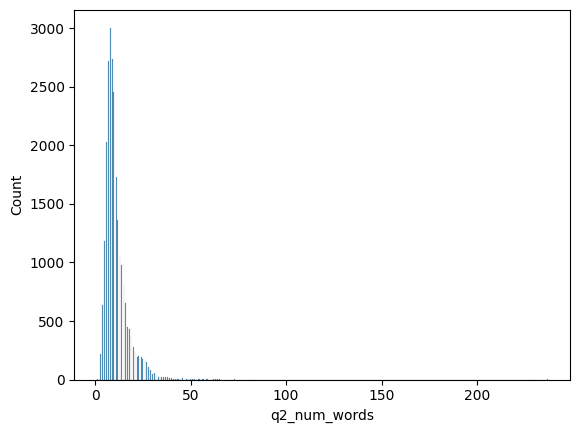

In [47]:
print('q2_num_words')
sns.histplot(df['q2_num_words'])
print("Maximum words: ", max(df['q2_num_words']))
print("Minimum words: ", min(df['q2_num_words']))

common words


C:\Users\write\AppData\Local\Temp\ipykernel_18168\1146217489.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 0]['word_common'], label='non duplicate')
C:\Users\write\AppData\Local\Temp\ipykernel_18168\1146217489.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[

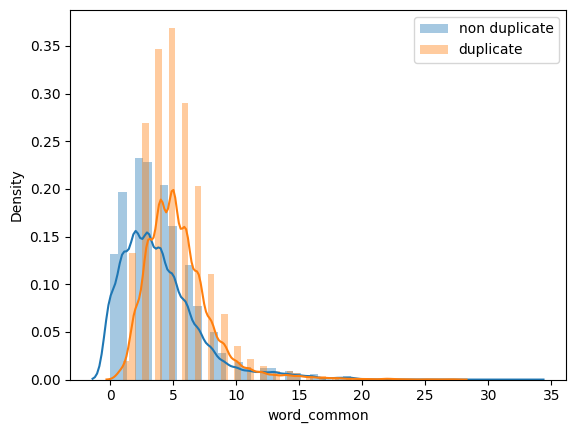

In [48]:
print("common words")
sns.distplot(df[df['is_duplicate'] == 0]['word_common'], label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_common'], label='duplicate')
             
plt.legend()

total words


C:\Users\write\AppData\Local\Temp\ipykernel_18168\2082822749.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 0]['word_common'], label='non duplicate')
C:\Users\write\AppData\Local\Temp\ipykernel_18168\2082822749.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[

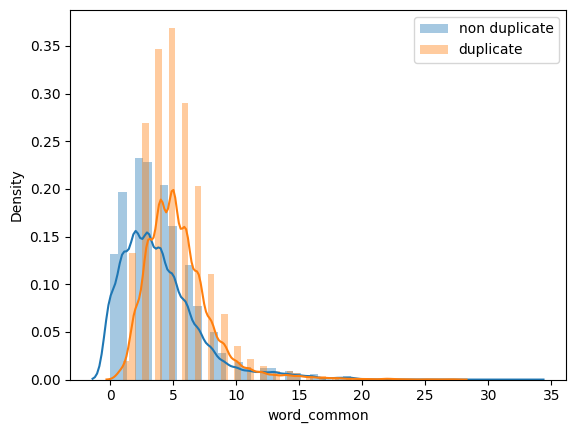

In [49]:
print('total words')

sns.distplot(df[df['is_duplicate'] == 0]['word_common'], label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_common'], label='duplicate')
plt.legend()

word share


C:\Users\write\AppData\Local\Temp\ipykernel_18168\3868646439.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 0]['word_share'], label='non duplicate')
C:\Users\write\AppData\Local\Temp\ipykernel_18168\3868646439.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[d

<Axes: xlabel='word_share', ylabel='Density'>

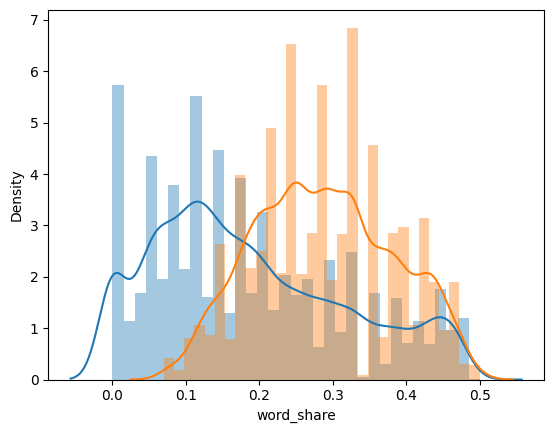

In [50]:
print('word share')
sns.distplot(df[df['is_duplicate'] == 0]['word_share'], label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_share'], label='duplicate')

In [51]:
ques_df = df[['question1', 'question2']]
print(ques_df.shape)
ques_df.head()

(25000, 2)


,question1,question2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?


In [52]:
final_df = df.drop(columns=['id', 'qid1', 'qid2', 'question1', 'question2'])
print(final_df.shape)
final_df.head()

(25000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,words_total,word_share
0,0,66,57,14,12,10,23,0.43
1,0,51,88,8,13,4,20,0.20
2,0,73,59,14,10,4,24,0.17
3,0,50,65,11,9,0,19,0.00
4,0,76,39,13,7,2,20,0.10


In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
# merge text
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=5000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)

In [55]:
q1_arr.shape

(25000, 5000)

In [56]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)

temp_df = pd.concat([temp_df1, temp_df2], axis=1)

In [57]:
temp_df.shape

(25000, 10000)

In [58]:
final_df = pd.concat([final_df, temp_df], axis=1)
final_df.shape

(25000, 10008)

In [59]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,words_total,word_share,0,1,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,66,57,14,12,10,23,0.43,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,51,88,8,13,4,20,0.20,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,73,59,14,10,4,24,0.17,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,50,65,11,9,0,19,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,76,39,13,7,2,20,0.10,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [61]:
type(X_train)

numpy.ndarray

In [62]:
X_train.shape

(20000, 10007)

In [63]:
y_train.shape

(20000,)

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, verbose=2)

In [65]:
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100

building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   15.4s


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomForestClassifier(n_jobs=-1, verbose=2)

In [66]:
y_pred = rf.predict(X_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


In [67]:
accuracy_score(y_pred, y_test)

0.7564

In [68]:
from xgboost import XGBClassifier

xgb = XGBClassifier(verbose=2, random_state=42, tree_method="hist", device="cuda")

In [69]:
xgb.fit(X_train, y_train)


C:\Users\write\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [00:01:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [70]:
y_pred = xgb.predict(X_test)

In [71]:
accuracy_score(y_pred, y_test)

0.7688

In [72]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(n_jobs=-1, verbose=2)

In [73]:
lr.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


LogisticRegression(n_jobs=-1, verbose=2)

In [74]:
y_pred = lr.predict(X_test)

In [75]:
accuracy_score(y_pred, y_test)

0.7392

In [76]:
X_train.shape

(20000, 10007)

In [77]:
import pickle

pickle.dump(rf, open('model.pkl', 'wb'))
pickle.dump(cv, open('countVector.pkl', 'wb'))

# Advanced Features
1. Token Features
- cwc_min: This is the ratio of the number of common words to the length of the smaller question
- cwc_max: This is the ratio of the number of common words to the length of the larger question
- csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
- csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions
- ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions
- ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions
- last_word_eq: 1 if the last word in the two questions is same, 0 otherwise
- first_word_eq: 1 if the first word in the two questions is same, 0 otherwise
  
2. Length Based Features
- mean_len: Mean of the length of the two questions (number of words)
- abs_len_diff: Absolute difference between the length of the two questions (number of words)
- longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question
  
3. Fuzzy Features
- fuzz_ratio: fuzz_ratio score from fuzzywuzzy
- fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy
- token_sort_ratio: token_sort_ratio from fuzzywuzzy
- token_set_ratio: token_set_ratio from fuzzywuzzy